<a href="https://colab.research.google.com/github/Aidas-Baublys/Python-hello-world/blob/master/03_Pandas/PP3_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PP3: Pandas

## Section 1: Getting and knowing your data

### Step 1. Import the necessary libraries

In [659]:
# Run all cells to avoid simple errors like "not defined", because pandas are imported only once here.
# Also, colab sometimes does not recognise data frame type after it is assinged to variable with pd.read_csv
# so intelisense is incomplete and code blocks show false positive errors.
# Now we both know what to ingnore
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

In [660]:
data_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

### Step 3. Assign it to a variable called users and use the 'user_id' as index

In [661]:
users = pd.read_csv(data_url, sep="|", index_col="user_id")

### Step 4. See the first 25 entries

In [662]:
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


### Step 5. See the last 10 entries

In [663]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


### Step 6. What is the number of observations in the dataset?

In [664]:
# Observations are rows acording to this article https://medium.com/data-science-365/pandas-for-data-science-part-2-c12c3ee876c2, so
users.shape[0]

943

### Step 7. What is the number of columns in the dataset?

In [665]:
# Without user_id
users.shape[1]

4

In [666]:
# With user_id
5

5

### Step 8. Print the name of all the columns.

In [667]:
for col_name in users.columns.tolist():
  print(col_name)

age
gender
occupation
zip_code


### Step 9. How is the dataset indexed?

In [668]:
# Now by user_id, but originally the default way by row count starting from 0

### Step 10. What is the data type of each column?

In [669]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

### Step 11. Print only the occupation column

In [670]:
users.occupation

user_id
1         technician
2              other
3             writer
4         technician
5              other
           ...      
939          student
940    administrator
941          student
942        librarian
943          student
Name: occupation, Length: 943, dtype: object

### Step 12. How many different occupations are in this dataset?

In [671]:
users.occupation.unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [672]:
# If we include "other"
len(users.occupation.unique())

21

### Step 13. What is the most frequent occupation?

In [673]:
# Studnet
users.occupation.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

### Step 14. Summarize the DataFrame.

In [674]:
# Basing answer on this https://stackoverflow.com/questions/24524104/pandas-describe-is-not-returning-summary-of-all-columns 
# and this https://www.youtube.com/watch?v=Q06Y3DUSwz4&ab_channel=DataScienceTutorials
# By default describe ignores non numeric values.
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


### Step 15. Summarize all the columns

In [675]:
users.describe(include="all")

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


### Step 16. Summarize only the occupation column

In [676]:
# Columns can also be accessed by dot notation
users["occupation"].describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

### Step 17. What is the mean age of users?

In [677]:
users.describe().loc[["mean"]]

,age
mean,34.051962


### Step 18. What is the age with least occurrence?

In [678]:
users.age.value_counts()

30    39
25    38
22    37
28    36
27    35
      ..
7      1
66     1
11     1
10     1
73     1
Name: age, Length: 61, dtype: int64

In [679]:
# These five ages
users.age.value_counts().tail(5)

7     1
66    1
11    1
10    1
73    1
Name: age, dtype: int64

## Section 2: Filtering and Sorting

### Step 1. Import the necessary libraries

In [680]:
# Already imported at the top of notebook

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv). 

In [681]:
euro_data_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

### Step 3. Assign it to a variable called euro12.

In [682]:
euro12 = pd.read_csv(euro_data_url)

### Step 4. Select only the Goal column.

In [683]:
euro12["Goals"]

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5. How many team participated in the Euro2012?

In [684]:
euro12["Team"].count()

16

### Step 6. What is the number of columns in the dataset?

In [685]:
euro12.shape[1]

35

### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [686]:
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [687]:
discipline.sort_values("Red Cards")

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
7,Italy,16,0
8,Netherlands,5,0
10,Portugal,12,0
12,Russia,6,0


In [688]:
discipline.sort_values("Yellow Cards")

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
11,Republic of Ireland,6,1
12,Russia,6,0
1,Czech Republic,7,0
9,Poland,7,1


### Step 9. Calculate the mean Yellow Cards given per Team

In [689]:
discipline["Yellow Cards"].mean()

7.4375

### Step 10. Filter teams that scored more than 6 goals

In [690]:
# Have to use euro12 dataframe, cause discipline does not have "Goals" column
a_lot_of_goals_filter = euro12["Goals"] > 6
euro12[a_lot_of_goals_filter]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### Step 11. Select the teams that start with G

In [691]:
team_g_selector = euro12["Team"].str.startswith("G")
discipline[team_g_selector]

,Team,Yellow Cards,Red Cards
5,Germany,4,0
6,Greece,9,1


### Step 12. Select the first 7 columns

In [692]:
discipline.head(7)

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1


### Step 13. Select all columns except the last 3.

In [693]:
discipline[:-3]

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [694]:
countries = ["England", "Italy", "Russia"]
country_filter = euro12["Team"].isin(countries)
euro12.loc[country_filter, ["Team", "Shooting Accuracy"]]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Section 3: Grouping

### Step 1. Import the necessary libraries

In [695]:
# Already imported at the top of notebook

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

In [696]:
drinks_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv"

### Step 3. Assign it to a variable called drinks.

In [697]:
drinks = pd.read_csv(drinks_url)

### Step 4. Which continent drinks more beer on average?

In [698]:
continent_group = drinks.groupby(["continent"])
sort_by_beer = continent_group["beer_servings"].mean().sort_values(ascending=False)
sort_by_beer.iloc[:1]

continent
EU    193.777778
Name: beer_servings, dtype: float64

### Step 5. For each continent print the statistics for wine consumption.

In [699]:
continent_group["wine_servings"].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. Print the mean alcohol consumption per continent for every column

In [700]:
# This works, but I get "FutureWarning: Indexing with multiple keys..." warning, which we can ignore in the present together
continent_group["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [701]:
# The same here. The future is full of warnings nowadays
continent_group["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [702]:
# Me thinks I putted data frame type out all along, yes I did
some_stats = continent_group["spirit_servings"].describe()[["mean", "min", "max"]]
print(type(some_stats))
some_stats

<class 'pandas.core.frame.DataFrame'>


,mean,min,max
continent,,,
AF,16.339623,0.0,152.0
AS,60.840909,0.0,326.0
EU,132.555556,0.0,373.0
OC,58.437500,0.0,254.0
SA,114.750000,25.0,302.0


## Section 4: Apply

### Step 1. Import the necessary libraries

In [703]:
# You know already

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

In [704]:
crime_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv"

### Step 3. Assign it to a variable called crime.

In [705]:
crime = pd.read_csv(crime_url)

### Step 4. What is the type of the columns?

In [706]:
crime.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [707]:
crime["Year"] = pd.to_datetime(crime["Year"], format="%Y")
crime.dtypes

Year                  datetime64[ns]
Population                     int64
Total                          int64
Violent                        int64
Property                       int64
Murder                         int64
Forcible_Rape                  int64
Robbery                        int64
Aggravated_assault             int64
Burglary                       int64
Larceny_Theft                  int64
Vehicle_Theft                  int64
dtype: object

### Step 6. Set the Year column as the index of the dataframe

In [708]:
# Will only set for this code block
crime.set_index("Year")

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965-01-01,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966-01-01,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967-01-01,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968-01-01,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


### Step 7. Delete the Total column

In [709]:
#  Will only delete for this code block
crime.drop(columns="Total")

,Year,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965-01-01,193526000,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966-01-01,195576000,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967-01-01,197457000,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968-01-01,199399000,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969-01-01,201385000,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [710]:
# Dropping the mistake, setting year as index for resample to work and summing
crime_by_decade = crime.drop(columns="Population").set_index('Year').resample('10AS').sum()
crime_by_decade

,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,49295900,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,100991600,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,50167967,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


### Step 9. What is the most dangerous decade to live in the US?

In [711]:
# The nineties, man, by all accounts and metrics
crime_categories = ["Total", "Violent",	"Property",	"Murder", "Forcible_Rape", "Robbery", "Aggravated_assault",	"Burglary",	"Larceny_Theft", "Vehicle_Theft"]

for category in crime_categories:
  print(crime_by_decade.sort_values(category, ascending=False)[category].head(1))

Year
1990-01-01    136582146
Name: Total, dtype: int64
Year
1990-01-01    17527048
Name: Violent, dtype: int64
Year
1990-01-01    119053499
Name: Property, dtype: int64
Year
1990-01-01    211664
Name: Murder, dtype: int64
Year
1990-01-01    998827
Name: Forcible_Rape, dtype: int64
Year
1990-01-01    5748930
Name: Robbery, dtype: int64
Year
1990-01-01    10568963
Name: Aggravated_assault, dtype: int64
Year
1980-01-01    33073494
Name: Burglary, dtype: int64
Year
1990-01-01    77679366
Name: Larceny_Theft, dtype: int64
Year
1990-01-01    14624418
Name: Vehicle_Theft, dtype: int64


## Section 5: Merge

### Step 1. Import the necessary libraries

In [712]:
# Yep.

### Step 2. Create the 3 DataFrames based on the following raw data

In [713]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### Step 3. Assign each to a variable called data1, data2, data3

In [714]:
data1 = pd.DataFrame(raw_data_1)
data2 = pd.DataFrame(raw_data_2)
data3 = pd.DataFrame(raw_data_3)

### Step 4. Join the two dataframes along rows and assign all_data

In [715]:
# Assuming data1 and data2 need to be joined and that all_data is a variable
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


### Step 5. Join the two dataframes along columns and assing to all_data_col

In [716]:
# This question is also incomplete, so choosing subject_id column
all_data_col = pd.merge(data1, data2, on='subject_id', how='outer')

### Step 6. Print data3

In [717]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


### Step 7. Merge all_data and data3 along the subject_id value

In [718]:
pd.merge(all_data, data3, on='subject_id', how='outer')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51.0
1,2,Amy,Ackerman,15.0
2,3,Allen,Ali,15.0
3,4,Alice,Aoni,61.0
4,4,Billy,Bonder,61.0
5,5,Ayoung,Atiches,16.0
6,5,Brian,Black,16.0
7,6,Bran,Balwner,NaN
8,7,Bryce,Brice,14.0
9,8,Betty,Btisan,15.0


### Step 8. Merge only the data that has the same 'subject_id' on both data1 and data2

In [719]:
pd.merge(data1, data2, on="subject_id")

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


### Step 9. Merge all values in data1 and data2, with matching records from both sides where available.

In [720]:
# Not sure I understood the question. Leave matching values? And matching as in equal?
pd.merge(data1, data2, how="outer") 

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


## Section 6: Stats

### Introduction:

The data have been modified to contain some missing values, identified by NaN.  
Using pandas should make this exercise
easier, in particular for the bonus question.

You should be able to perform all of these operations without using
a for loop or other looping construct.


1. The data in 'wind.data' has the following format:

In [721]:
"""
Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71
"""

'\nYr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\n'

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.   

   More information about the dataset go [here](wind.desc).

In [722]:
# Link does not work.

### Step 1. Import the necessary libraries

In [723]:
# Aha.

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data)

In [724]:
data_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"

### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [725]:
data = pd.read_csv(data_url, delim_whitespace=True, parse_dates={"Date": ["Yr" ,"Mo", "Dy"]})

### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [726]:
# Turns out we needed an import! Tricks on me
import numpy as np

# Checkout this cool lambda. Checks if date exceeds current year (2022 at the time of coding), if true, substracts a 100 years
fix_date = lambda x: x - np.timedelta64(100,'Y') if x > pd.to_datetime("2022") else x

# Apply lambda and normalize date to leave only date, but keep the datetime type
data["Date"] = data["Date"].apply(fix_date).dt.normalize()

### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [727]:
data.set_index("Date")

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### Step 6. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [728]:
# Pandas exclude by default NaN values from aggregation functions according to https://stackoverflow.com/questions/25039328/specifying-skip-na-when-calculating-mean-of-the-column-in-a-data-frame-created
data.iloc[:, 1:].isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [729]:
# First sum counts for each column and seconds counts total
data.notnull().sum().sum()

85431

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [730]:
# The as with sum
data.mean().mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


10.227982360836938

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [731]:
loc_stats = data.describe().loc[["min", "max", "mean", "std"]]

### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [732]:
# Drop date, apply describe to every row and select the desired columns
day_stats = data.drop("Date", axis=1).apply(pd.DataFrame.describe, axis=1)[["min", "max", "mean", "std"]]

### Step 11. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [733]:
january_filter = data["Date"].dt.month == 1
january = data[january_filter]
january.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### Step 12. Downsample the record to a yearly frequency for each location.

In [734]:
data.set_index("Date").resample("1Y").interpolate()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41


### Step 13. Downsample the record to a monthly frequency for each location.

In [735]:
data.set_index("Date").resample("1M").interpolate()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,12.92,12.75,12.92,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67


### Step 14. Downsample the record to a weekly frequency for each location.

In [736]:
data.set_index("Date").resample("1W").interpolate()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.960,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.040,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.590,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,15.795,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.210,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.920,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.870,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08


### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [737]:
# As you wish
data.set_index("Date").resample("1W", loffset="1d").interpolate().iloc[:52].describe().loc[["min", "max", "mean", "std"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,3.040000,2.750000,4.210000,1.710000,4.460000,1.870000,2.210000,2.620000,2.880000,3.920000,4.210000,3.330000
max,25.800000,23.910000,22.420000,17.540000,24.080000,19.700000,22.000000,20.250000,21.460000,20.040000,29.630000,26.580000
mean,12.194808,10.626538,11.261731,6.957404,11.242745,7.946346,9.885192,9.305385,8.823077,9.939615,14.015192,13.282692
std,5.280537,4.782553,4.714533,3.769603,4.770084,3.906412,4.653007,4.022109,4.181664,4.077699,5.885208,5.785169


## Section 7: Visualization

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [738]:
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

In [739]:
titanic_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv"

### Step 3. Assign it to a variable titanic 

In [740]:
titanic = pd.read_csv(titanic_url)

### Step 4. Set PassengerId as the index 

In [741]:
titanic.set_index("PassengerId", inplace=True)

### Step 5. Create a pie chart presenting the male/female proportion

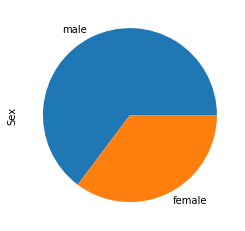

In [742]:
titanic["Sex"].value_counts().plot(kind="pie")

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

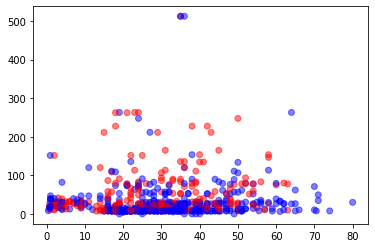

In [743]:
mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['Age'], titanic['Fare'], alpha=0.5, c=titanic['Sex'].map(mapping))

### Step 7. How many people survived?

In [744]:
titanic['Survived'].value_counts()[1]

342

### Step 8. Create a histogram with the Fare payed

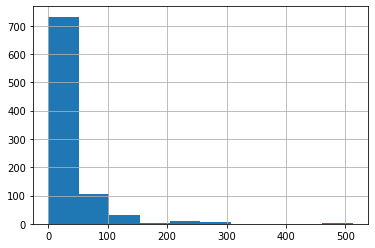

In [745]:
titanic["Fare"].hist()

### BONUS: Create your own question and answer it.

# When will this end?

In [746]:
print("Soon")

Soon


## Section 8: Creating Series and DataFrames

### Introduction:

This time you will create the data.



### Step 1. Import the necessary libraries

In [747]:
# ...

### Step 2. Create a data dictionary that looks like the DataFrame below

In [748]:
pokedex = {
  1: {'name': 'Charmander',
  'type': 'Fire',
  'hp': 451,
  "evolution": "turbo",
  "pokedex": False},
 2: {'name': 'Squirtle',
  'type': 'Water',
  'hp': 443,
  "evolution": "turbo",
  "pokedex": False},
 3: {'name': 'Bulbasaur',
  'type': 'Poison',
  'hp': 436,
  "evolution": "turbo",
  "pokedex": False}
}

### Step 3. Assign it to a variable called pokemon

In [749]:
pokemon = pd.DataFrame.from_dict(pokedex)

### Step 4. Ops...it seems the DataFrame columns are in alphabetical order. Place  the order of the columns as name, type, hp, evolution, pokedex

In [750]:
# My data is just fine
# Also, why ask to create "a data dictionary that looks like the DataFrame", inplying random values and arbitrary structure if you want it to be pokemon?
# I see we both got tired. This task / project is way too long
pokemon_data = pokemon.transpose(copy=True)

### Step 5. Add another column called place, and insert what you have in mind.

In [751]:
pokemon_data["place"] = "Mind is empty"

### Step 6. Present the type of each column

In [752]:
pokemon_data.dtypes

name         object
type         object
hp           object
evolution    object
pokedex      object
place        object
dtype: object

### BONUS: Create your own question and answer it.

How cruel are humans?

In [753]:
print("Very")

Very


## Section: 9 Time Series

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [754]:
# Importing...
# Done.

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [755]:
apple_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"

### Step 3. Assign it to a variable apple

In [756]:
apple = pd.read_csv(apple_url)

### Step 4.  Check out the type of the columns

In [757]:
# This again? I'm guessing it's karma for making fun of grandma
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [758]:
# Sir, yes, sir
apple["Date"] = pd.to_datetime(apple["Date"], format="%Y-%m-%d")

### Step 6.  Set the date as the index

In [759]:
apple.set_index("Date", inplace=True)

### Step 7.  Is there any duplicate dates?

In [760]:
apple.index.has_duplicates

False

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [761]:
apple.iloc[::-1]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [762]:
# The data is already filtered for only business days as it is trading data, so only need to get last day of each month
# There many ways, but this one is mine. Group index (as it is dates) by month and find last index of each group with lamba
eom_filter = apple.groupby(apple.index.to_period('M')).apply(lambda x: x.index.max())

apple.loc[eom_filter]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


### Step 10.  What is the difference in days between the first day and the oldest

In [763]:
(apple.index[0] - apple.index[-1]).days

12261

### Step 11.  How many months in the data we have?

In [764]:
# Previous answer produced last day of each month, so month number is the same as row count
apple.loc[eom_filter].shape[0]

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

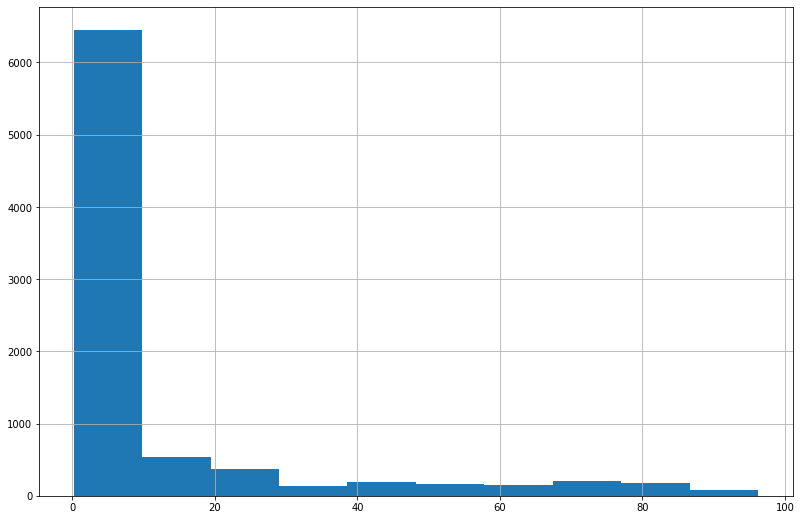

In [765]:
# Just found out that this whole sections is a copy from https://www.kaggle.com/code/kunalmadaan03/pandas-exercise-apple-stock/notebook
# What else are you hiding?..
apple["Adj Close"].hist(figsize=(13.5, 9))

## Section 10: Deleting

### Introduction:

This exercise is a adaptation from the UCI Wine dataset.
The only pupose is to practice deleting data with pandas.

### Step 1. Import the necessary libraries

### Step 2. Import the dataset from this [address](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data). 

### Step 3. Assign it to a variable called wine

In [766]:
# Auto download link, eh? You sneaky little minx
# Also - https://www.kaggle.com/code/kunalmadaan03/pandas-missing-values-exercise :D
# So I'm definately NOT copying answers from there
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(wine_url)

### Step 4. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [767]:
wine.drop(wine.columns[[0, 3, 6, 8, 10, 12, 13]], axis = 1, inplace=True)

### Step 5. Assign the columns as below:

The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [768]:
wine.columns = ["alcohol","malic_acid","alcalinity_of_ash","magnesium","flavanoids","proanthocyanins","hue"]

### Step 6. Set the values of the first 3 rows from alcohol as NaN

In [769]:
wine.alcohol.iloc[:3] = np.NAN

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Step 7. Now set the value of the rows 3 and 4 of magnesium as NaN

In [770]:
wine.magnesium.iloc[2:4] = np.NAN

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Step 8. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [771]:
wine.alcohol = wine.alcohol.fillna(10)
wine.magnesium = wine.magnesium.fillna(100)

### Step 9. Count the number of missing values

In [772]:
wine.isnull().sum().sum()

0

### Step 10.  Create an array of 10 random numbers up until 10

In [773]:
# Ah, you modified this question by dropping the end from the original. Well played, sir, well played indeed!
rand_nums = np.random.randint(0, 11, 10)

### Step 11.  Use random numbers you generated as an index and assign NaN value to each of cell.

In [774]:
# Presuming you mean each row as column was not specified
wine.iloc[rand_nums] = np.NAN

### Step 12.  How many missing values do we have?

In [775]:
wine.isnull().sum().sum()

49

### Step 13. Delete the rows that contain missing values

In [776]:
wine.dropna()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
2,10.00,1.95,16.8,100.0,3.49,2.18,0.86
4,14.20,1.76,15.2,112.0,3.39,1.97,1.05
6,14.06,2.15,17.6,121.0,2.51,1.25,1.06
8,13.86,1.35,16.0,98.0,3.15,1.85,1.01
11,13.75,1.73,16.0,89.0,2.76,1.81,1.15
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95.0,0.61,1.06,0.64
173,13.40,3.91,23.0,102.0,0.75,1.41,0.70
174,13.27,4.28,20.0,120.0,0.69,1.35,0.59
175,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### Step 14. Print only the non-null values in alcohol

In [777]:
wine.alcohol.dropna()

2      10.00
4      14.20
6      14.06
8      13.86
11     13.75
       ...  
172    13.71
173    13.40
174    13.27
175    13.17
176    14.13
Name: alcohol, Length: 170, dtype: float64

### Step 15.  Reset the index, so it starts with 0 again

In [778]:
wine.reset_index(drop=True)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.00,1.95,16.8,100.0,3.49,2.18,0.86
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.20,1.76,15.2,112.0,3.39,1.97,1.05
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95.0,0.61,1.06,0.64
173,13.40,3.91,23.0,102.0,0.75,1.41,0.70
174,13.27,4.28,20.0,120.0,0.69,1.35,0.59
175,13.17,2.59,20.0,120.0,0.68,1.46,0.60


In [781]:
# I... I can't believe it's finally over... Good god...

In [780]:
# That's what she said